<h1><center> Statistiques Initiales

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import des données :
df = pd.read_csv( "training.csv", sep=';')
df.head()

,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,Poldur,Value,Adind,SubGroup2,Group2,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
1,200114978,2009,Male,C,Large,Employed,25,18,90,3,15080,0,L46,L,72.012883,365,1,0,0.0,0.0
2,200114994,2009,Male,E,Large,Employed,20,11,30,2,22370,1,O38,O,39.550411,365,1,0,0.0,0.0
3,200115001,2009,Female,E,Large,Unemployed,42,11,150,0,39650,0,Q28,Q,169.529148,365,2,0,0.0,0.0
4,200115011,2009,Female,C,Medium,Housewife,21,5,0,0,12600,1,L6,L,58.894688,365,1,0,0.0,0.0
5,200115015,2009,Female,D,Large,Employed,33,12,30,10,9065,0,N4,N,109.631885,365,2,0,0.0,0.0


In [45]:
df.shape

(100021, 20)

In [47]:
df.columns

Index(['PolNum', 'CalYear', 'Gender', 'Type', 'Category', 'Occupation', 'Age',
       'Group1', 'Bonus', 'Poldur', 'Value', 'Adind', 'SubGroup2', 'Group2',
       'Density', 'Exppdays', 'Numtppd', 'Numtpbi', 'Indtppd', 'Indtpbi'],
      dtype='object')

In [43]:
# Qualitative variables
cat_data = df.select_dtypes(include=['object'])  
cat_data_mod = []

for var in cat_data.columns:
    modalities = cat_data[var].astype(str).unique()
    count = len(modalities)
    cat_data_mod.append([var, count, np.sort(modalities)])

cat_data_mod = pd.DataFrame(cat_data_mod, columns=['Variable', 'Number of Modalities', 'Modalities'])
display(cat_data_mod)

,Variable,Number of Modalities,Modalities
0,Gender,2,"[Female, Male]"
1,Type,6,"[A, B, C, D, E, F]"
2,Category,3,"[Large, Medium, Small]"
3,Occupation,5,"[Employed, Housewife, Retired, Self-employed, ..."
4,SubGroup2,471,"[L1, L10, L100, L101, L102, L103, L104, L105, ..."
5,Group2,10,"[L, M, N, O, P, Q, R, S, T, U]"


In [27]:
df.describe(include= ['O'])

,Gender,Type,Category,Occupation,SubGroup2,Group2
count,100021,100021,100021,100021,100021,100021
unique,2,6,3,5,471,10
top,Male,A,Medium,Employed,Q29,L
freq,63443,27760,36644,31150,431,23733


In [ ]:
#Gender : genre du conducteur du véhicule 
#Type : type de voiture 
#Category : catégorie de la voiture 
#Occupation : profession du conducteur 
#SubGroup2 : Sous-région du domicile du conducteur 
#Group2 : Région du domicile du conducteur 

In [35]:
gender_percentage = df['Gender'].value_counts(normalize=True) * 100
gender_percentage


Male      63.42968
Female    36.57032
Name: Gender, dtype: float64

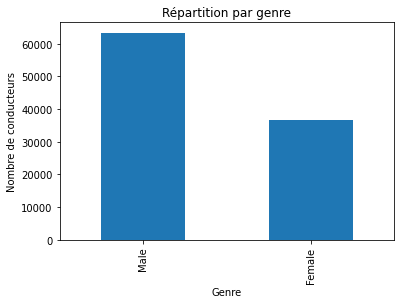

In [50]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Répartition par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de conducteurs')
plt.show()


In [13]:
df.groupby('Gender')["Type"].value_counts()

Gender  Type
Female  A       10206
        B        7980
        D        7201
        C        5079
        E        4097
        F        2015
Male    A       17554
        B       14110
        D       12396
        C        8783
        E        7074
        F        3526
Name: Type, dtype: int64

In [16]:
 pd.crosstab(df['Gender'], df['type'])

Type,A,B,C,D,E,F
Gender,,,,,,
Female,10206,7980,5079,7201,4097,2015
Male,17554,14110,8783,12396,7074,3526


In [25]:
pd.crosstab(df['SubGroup2'], df['Occupation']).head()

Occupation,Employed,Housewife,Retired,Self-employed,Unemployed
SubGroup2,,,,,
L1,48,21,21,32,26
L10,58,29,26,37,29
L100,52,43,19,34,37
L101,67,31,25,30,23
L102,62,39,25,35,22


In [28]:
 
df.describe(include= [np.number])


,PolNum,CalYear,Age,Group1,Bonus,Poldur,Value,Adind,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
count,1.000210e+05,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000
mean,2.002003e+08,2009.499895,41.122514,10.692625,-6.921646,5.470781,16454.675268,0.512142,117.159270,327.588007,0.147449,0.046790,106.135007,222.762829
std,6.217239e+04,0.500002,14.299349,4.687286,48.633165,4.591194,10506.742732,0.499855,79.500907,73.564636,0.436917,0.219546,444.949188,1859.422836
min,2.001149e+08,2009.000000,18.000000,1.000000,-50.000000,0.000000,1000.000000,0.000000,14.377142,91.000000,0.000000,0.000000,0.000000,0.000000
25%,2.001399e+08,2009.000000,30.000000,7.000000,-40.000000,1.000000,8380.000000,0.000000,50.625783,340.000000,0.000000,0.000000,0.000000,0.000000
50%,2.001649e+08,2009.000000,40.000000,11.000000,-30.000000,4.000000,14610.000000,1.000000,94.364623,365.000000,0.000000,0.000000,0.000000,0.000000
75%,2.002608e+08,2010.000000,51.000000,14.000000,10.000000,9.000000,22575.000000,1.000000,174.644525,365.000000,0.000000,0.000000,0.000000,0.000000
max,2.002858e+08,2010.000000,75.000000,20.000000,150.000000,15.000000,49995.000000,1.000000,297.385170,365.000000,7.000000,3.000000,12878.369910,69068.026292


In [ ]:
#PolNum : numéro du contrat 
#CalYear : année de souscription 
#Category : catégorie de la voiture 
#Age : âge du conducteur 
#Group1 : groupe de la voiture 
#Bonus : Bonus Malus (réduction pour non-sinistre en France) 
#Poldur : Âge du contrat d'assurance 
#Value : Valeur de la voiture 
#Adind : Indicateur pour une couverture 'matérielle' 
#Density : Densité de population 
#Expdays : Exposition (en jours) 
#Numtppd : Nombre de sinistres matériels tiers 
#Numtpbi : Nombre de sinistres corporels tiers 
#Indtppd : Coût total des sinistres matériels tiers 
#Indtpbi : Coût total des sinistres corporels tiers 

<AxesSubplot:xlabel='Age'>

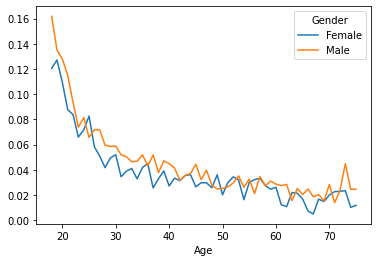

In [29]:
# var = 'Numtppd'
var = 'Numtpbi'
df2 = df.groupby(['Age', 'Gender'], as_index=False)[[var]].mean()
df2.pivot(index='Age', columns='Gender', values=var).plot()

<AxesSubplot:xlabel='Age'>

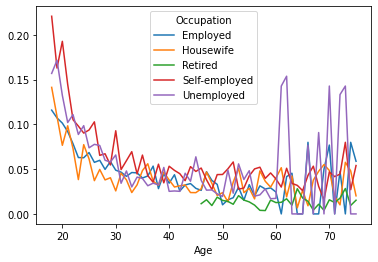

In [30]:
var = 'Numtpbi'
df2 = df.groupby(['Age', 'Occupation'], as_index=False)[[var]].mean()
df2.pivot(index='Age', columns='Occupation', values=var).plot()

In [39]:
 
age_occupation_distribution = df.groupby(['Age', 'Occupation']).size().unstack(fill_value=0)
age_occupation_proportion = age_occupation_distribution.div(age_occupation_distribution.sum(axis=1), axis=0)

from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(age_occupation_distribution)
missing_values, p_value, age_occupation_proportion
 

(Age           0
 Occupation    0
 dtype: int64,
 0.0,
 Occupation  Employed  Housewife   Retired  Self-employed  Unemployed
 Age                                                                 
 18          0.450713   0.172209  0.000000       0.142518    0.234561
 19          0.456907   0.146399  0.000000       0.159386    0.237308
 20          0.451509   0.147629  0.000000       0.164871    0.235991
 21          0.442820   0.169713  0.000000       0.162402    0.225065
 22          0.463190   0.147239  0.000000       0.135992    0.253579
 23          0.453407   0.156814  0.000000       0.158317    0.231463
 24          0.466038   0.158491  0.000000       0.141038    0.234434
 25          0.456932   0.164901  0.000000       0.147398    0.230769
 26          0.482680   0.134913  0.000000       0.159526    0.222881
 27          0.470241   0.146297  0.000000       0.145843    0.237619
 28          0.463947   0.162752  0.000000       0.153276    0.220025
 29          0.470588   0.154777  0

Le résultat du test du Chi-carré confirme que la distribution des professions n'est pas indépendante de l'âge, ce qui est cohérent avec les étapes de la vie et la progression de carrière attendues.






<AxesSubplot:xlabel='Poldur'>

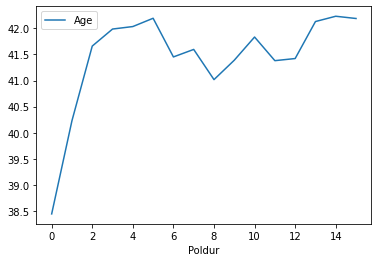

In [31]:
df.groupby(['Poldur'])[['Age']].mean().plot()
#la relation entre la durée de la police d'assurance et l'âge moyen des assurés

<AxesSubplot:xlabel='Age'>

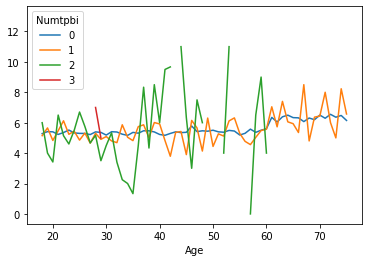

In [40]:
var = 'Numtpbi'
df2 = df.groupby(['Age', var], as_index=False)[['Poldur']].mean()
df2.pivot(index='Age', columns=var, values='Poldur').plot()
#la moyenne de 'Poldur' augmente avec l'âge des groupes de 2 à 4 ans

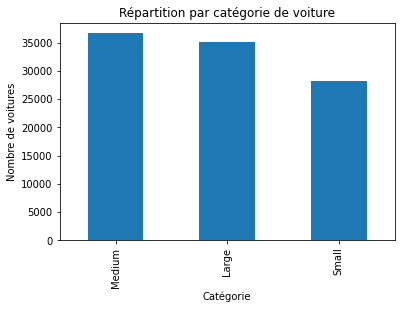

In [48]:
#Répartition des voitures par catégorie:
df['Category'].value_counts().plot(kind='bar')
plt.title('Répartition par catégorie de voiture')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de voitures')
plt.show()



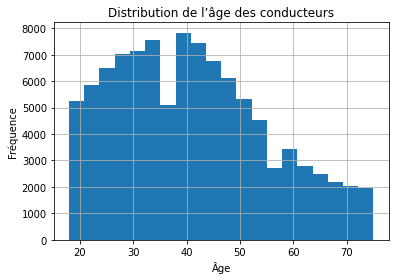

In [49]:
#Distribution de l'âge des conducteurs:

df['Age'].hist(bins=20)
plt.title('Distribution de l’âge des conducteurs')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


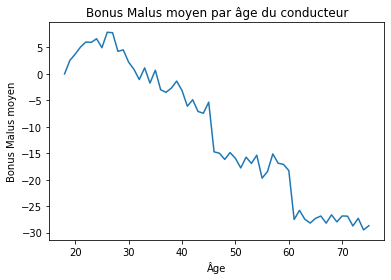

In [51]:
#Moyenne du Bonus Malus par âge du conducteur:
df.groupby('Age')['Bonus'].mean().plot(kind='line')
plt.title('Bonus Malus moyen par âge du conducteur')
plt.xlabel('Âge')
plt.ylabel('Bonus Malus moyen')
plt.show()



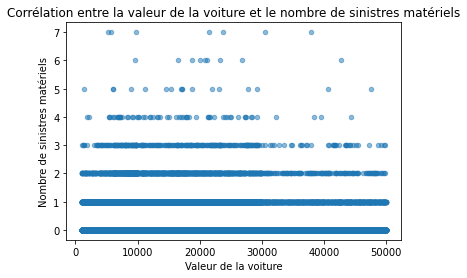

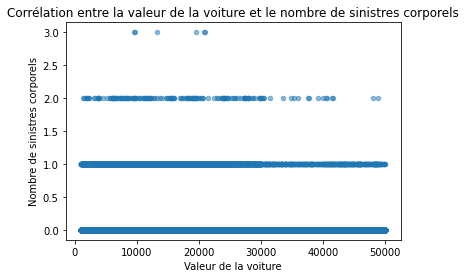

In [52]:
#Corrélation entre la valeur de la voiture et le nombre de sinistres:

df.plot(kind='scatter', x='Value', y='Numtppd', alpha=0.5)
plt.title('Corrélation entre la valeur de la voiture et le nombre de sinistres matériels')
plt.xlabel('Valeur de la voiture')
plt.ylabel('Nombre de sinistres matériels')
plt.show()

df.plot(kind='scatter', x='Value', y='Numtpbi', alpha=0.5)
plt.title('Corrélation entre la valeur de la voiture et le nombre de sinistres corporels')
plt.xlabel('Valeur de la voiture')
plt.ylabel('Nombre de sinistres corporels')
plt.show()


<ipython-input-53-9d08c671fcf8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Group2')['Numtppd', 'Numtpbi'].mean().plot(kind='bar')


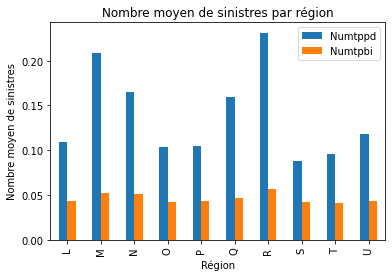

<ipython-input-53-9d08c671fcf8>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('SubGroup2')['Numtppd', 'Numtpbi'].mean().plot(kind='bar')


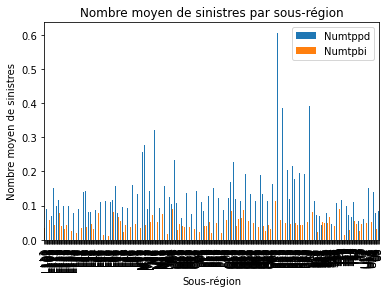

In [53]:
#Nombre moyen de sinistres par région et sous-région:
df.groupby('Group2')['Numtppd', 'Numtpbi'].mean().plot(kind='bar')
plt.title('Nombre moyen de sinistres par région')
plt.xlabel('Région')
plt.ylabel('Nombre moyen de sinistres')
plt.show()

df.groupby('SubGroup2')['Numtppd', 'Numtpbi'].mean().plot(kind='bar')
plt.title('Nombre moyen de sinistres par sous-région')
plt.xlabel('Sous-région')
plt.ylabel('Nombre moyen de sinistres')
plt.show()




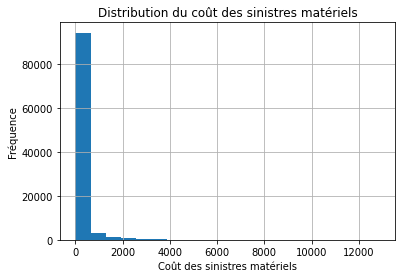

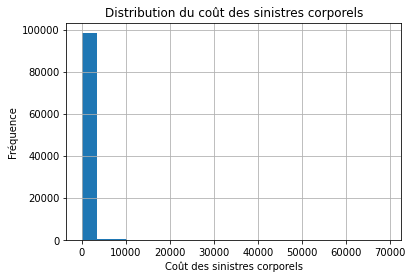

In [54]:
#Distribution du coût des sinistres
df['Indtppd'].hist(bins=20)
plt.title('Distribution du coût des sinistres matériels')
plt.xlabel('Coût des sinistres matériels')
plt.ylabel('Fréquence')
plt.show()

df['Indtpbi'].hist(bins=20)
plt.title('Distribution du coût des sinistres corporels')
plt.xlabel('Coût des sinistres corporels')
plt.ylabel('Fréquence')
plt.show()


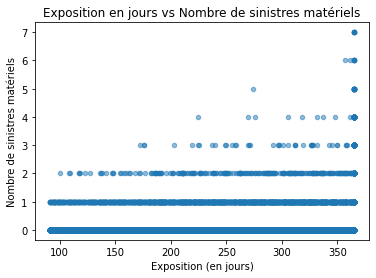

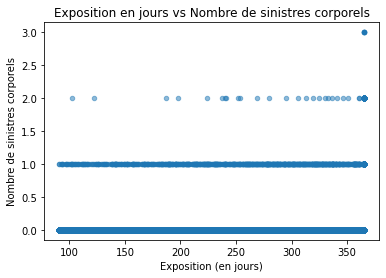

In [60]:
#Exposition (en jours) par rapport aux sinistres
df.plot(kind='scatter', x='Exppdays', y='Numtppd', alpha=0.5)
plt.title('Exposition en jours vs Nombre de sinistres matériels')
plt.xlabel('Exposition (en jours)')
plt.ylabel('Nombre de sinistres matériels')
plt.show()

df.plot(kind='scatter', x='Exppdays', y='Numtpbi', alpha=0.5)
plt.title('Exposition en jours vs Nombre de sinistres corporels')
plt.xlabel('Exposition (en jours)')
plt.ylabel('Nombre de sinistres corporels')
plt.show()




In [65]:
#valeur manquante 
df.isnull().sum()

PolNum        0
CalYear       0
Gender        0
Type          0
Category      0
Occupation    0
Age           0
Group1        0
Bonus         0
Poldur        0
Value         0
Adind         0
SubGroup2     0
Group2        0
Density       0
Exppdays      0
Numtppd       0
Numtpbi       0
Indtppd       0
Indtpbi       0
dtype: int64